# 載入套件

In [1]:
!pip install opencv-contrib-python -U

     |████████████████████████████████| 57.4MB 54kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [1]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2
import numpy as np
print(cv2.__version__)

4.5.2


# 繪製輪廓

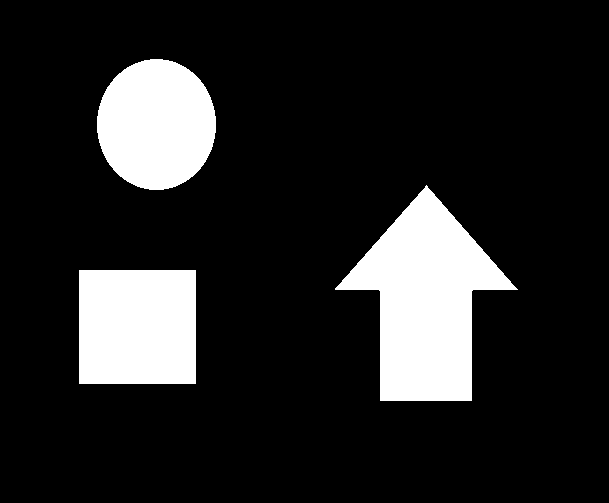

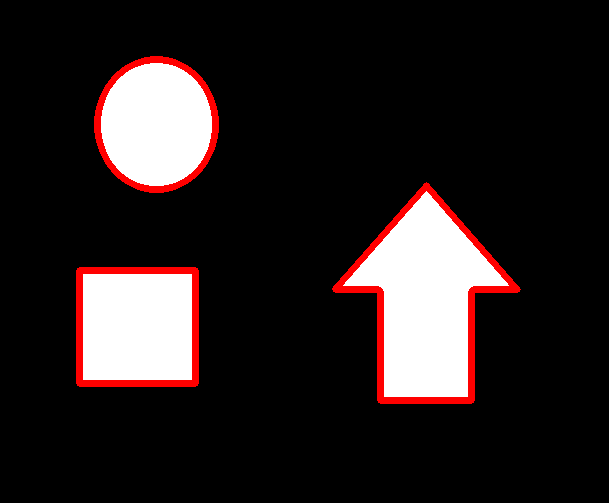

In [2]:
o = cv2.imread('contours.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)  
o=cv2.drawContours(o,contours,-1,(0,0,255),5) 
cv2_imshow(o) 


# 逐一顯示影像的邊緣資訊

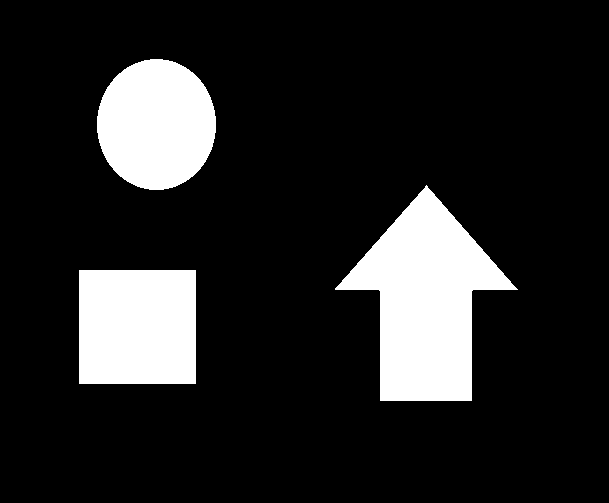

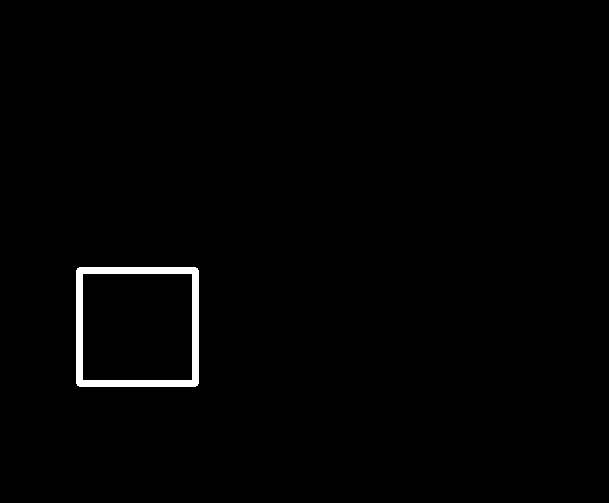

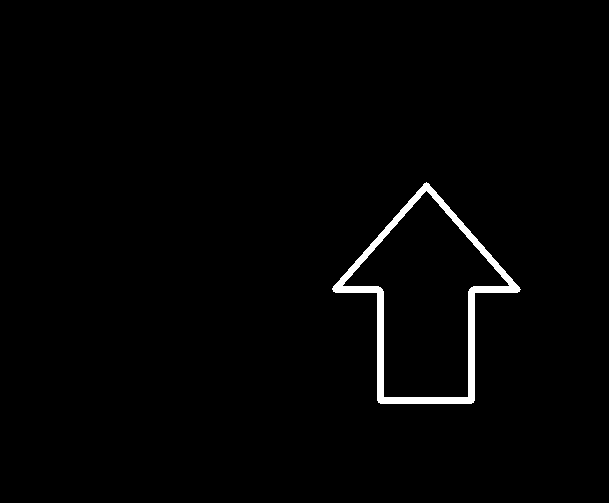

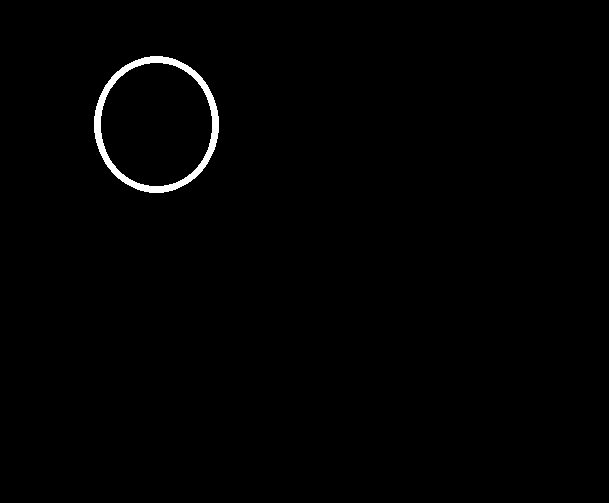

In [3]:
o = cv2.imread('contours.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)  
n=len(contours)
contoursImg=[]
for i in range(n):
    temp=np.zeros(o.shape,np.uint8)
    contoursImg.append(temp)
    contoursImg[i]=cv2.drawContours(
            contoursImg[i],contours,i,(255,255,255),5) 
    cv2_imshow(contoursImg[i])    


# 顯示彩色影像的輪廓

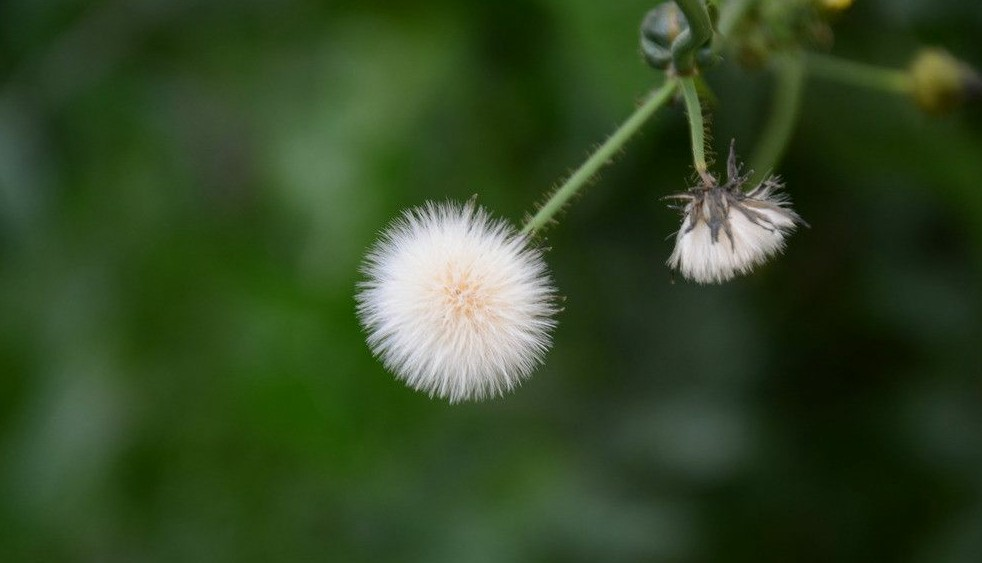

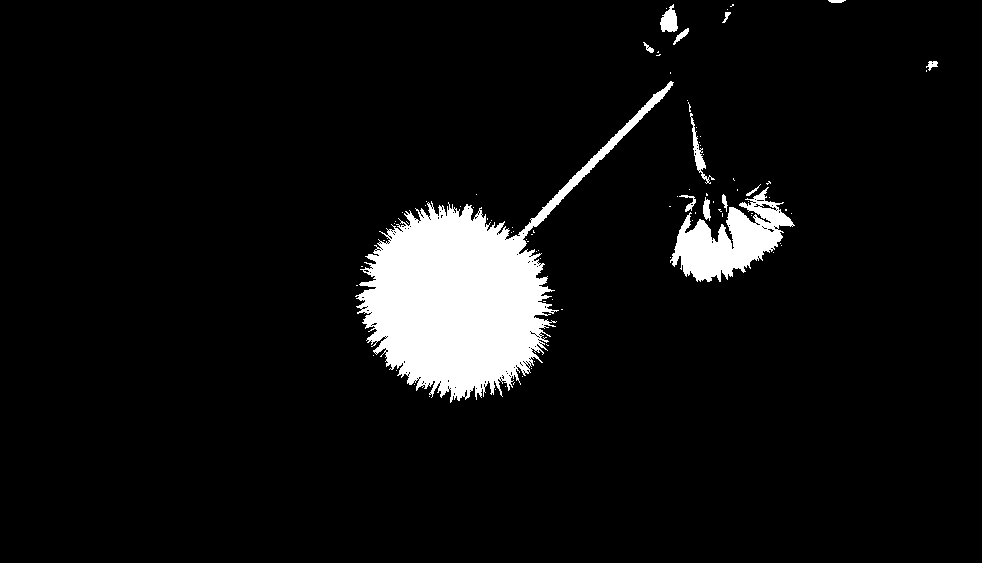

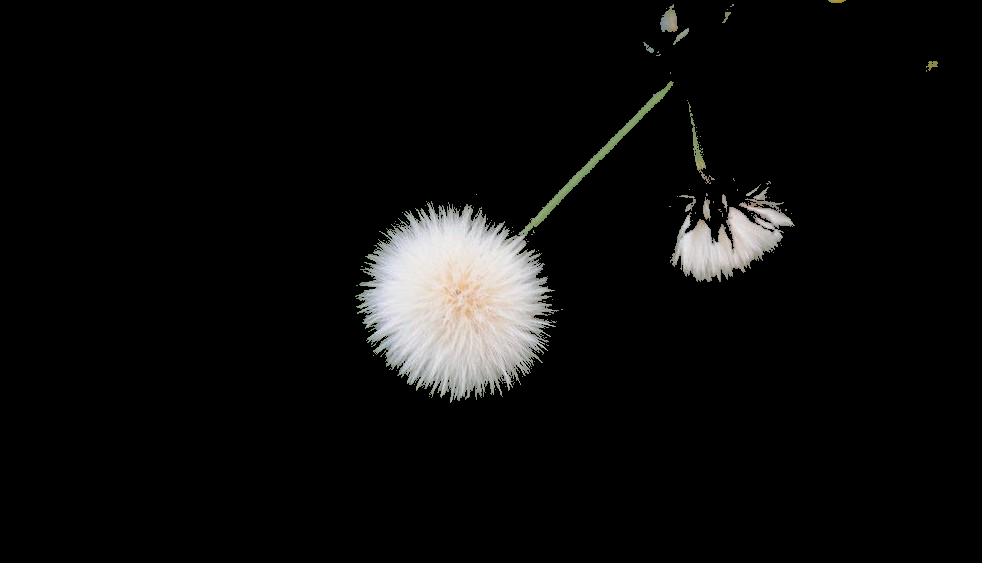

In [5]:
o = cv2.imread('loc3.jpg')
cv2_imshow(o)  
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  
mask=np.zeros(o.shape,np.uint8)
mask=cv2.drawContours(mask,contours,-1,(255,255,255),-1) 
cv2_imshow(mask)
loc=cv2.bitwise_and(o,mask)    
cv2_imshow(loc)


# 計算輪廓的矩(moments)

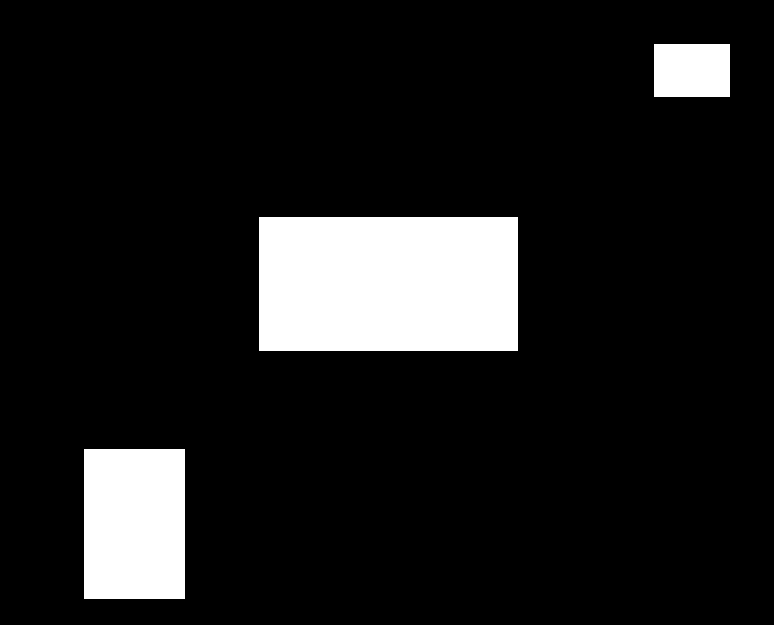

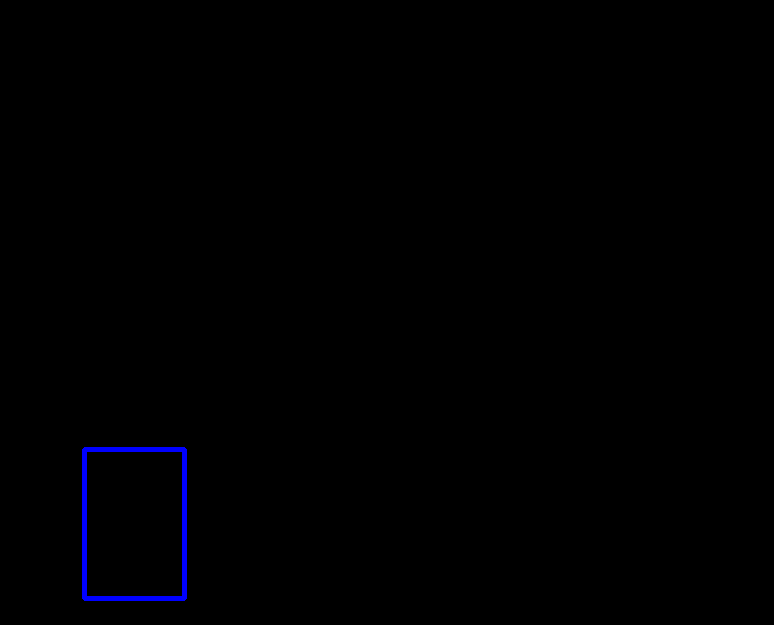

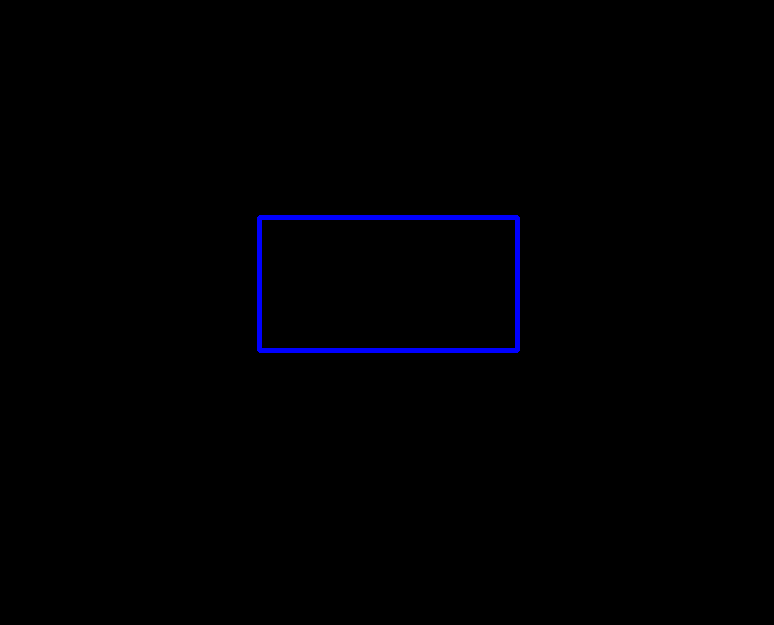

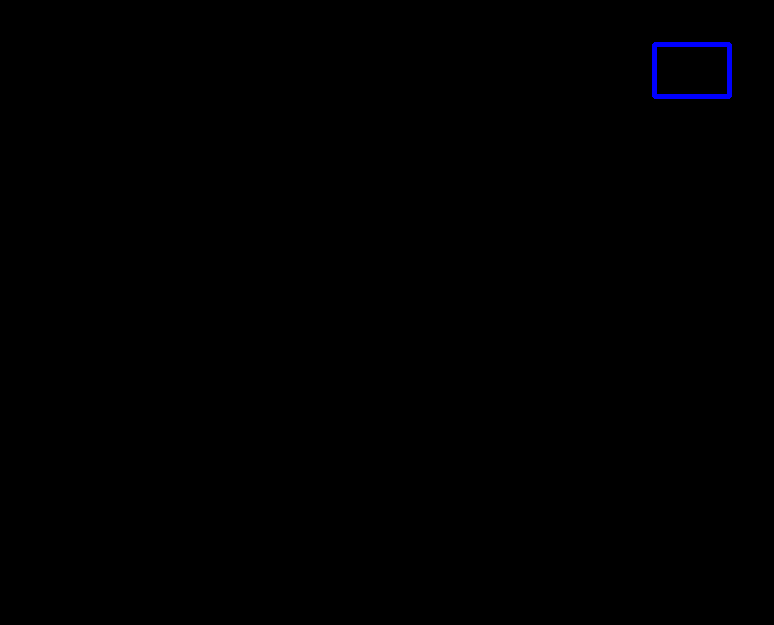

觀察各個輪廓的矩（moments）:
輪廓0的矩:
 {'m00': 14900.0, 'm10': 1996600.0, 'm01': 7800150.0, 'm20': 279961066.6666666, 'm11': 1045220100.0, 'm02': 4110944766.6666665, 'm30': 40842449600.0, 'm21': 146559618400.0, 'm12': 550866598733.3334, 'm03': 2180941440375.0, 'mu20': 12416666.666666627, 'mu11': 0.0, 'mu02': 27566241.666666508, 'mu30': 1.52587890625e-05, 'mu21': 2.09808349609375e-05, 'mu12': 6.198883056640625e-05, 'mu03': 0.000244140625, 'nu20': 0.05592841163310942, 'nu11': 0.0, 'nu02': 0.12416666666666591, 'nu30': 5.630596400372416e-16, 'nu21': 7.742070050512072e-16, 'nu12': 2.2874297876512943e-15, 'nu03': 9.008954240595866e-15}
輪廓1的矩:
 {'m00': 34314.0, 'm10': 13313832.0, 'm01': 9728019.0, 'm20': 5356106574.0, 'm11': 3774471372.0, 'm02': 2808475082.0, 'm30': 2225873002920.0, 'm21': 1518456213729.0, 'm12': 1089688331816.0, 'm03': 824882507095.5, 'mu20': 190339758.0, 'mu11': 0.0, 'mu02': 50581695.5, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.16165413533834588, 'nu11': 0.0, 'nu02'

In [6]:
o = cv2.imread('moments.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  
n=len(contours)
contoursImg=[]
for i in range(n):
    temp=np.zeros(o.shape,np.uint8)
    contoursImg.append(temp)
    contoursImg[i]=cv2.drawContours(contoursImg[i],contours,i,255,3) 
    cv2_imshow(contoursImg[i]) 
print("觀察各個輪廓的矩（moments）:")
for i in range(n):
    print("輪廓"+str(i)+"的矩:\n",cv2.moments(contours[i]))
print("觀察各個輪廓的面積:")
for i in range(n):
    print("輪廓"+str(i)+"的面積:%d" %cv2.moments(contours[i])['m00'])


# 計算面積

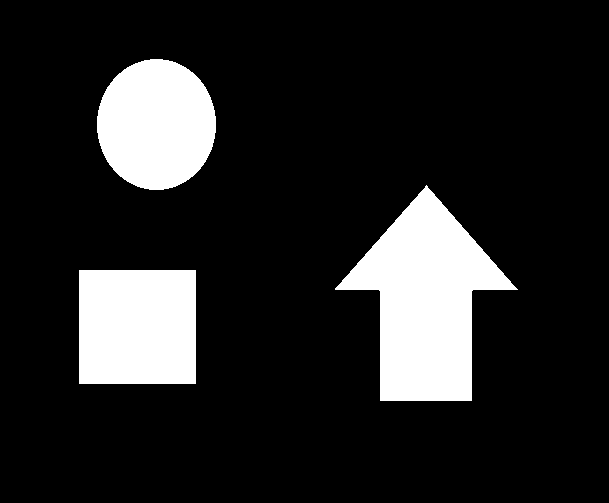

contours[0]面積= 13108.0


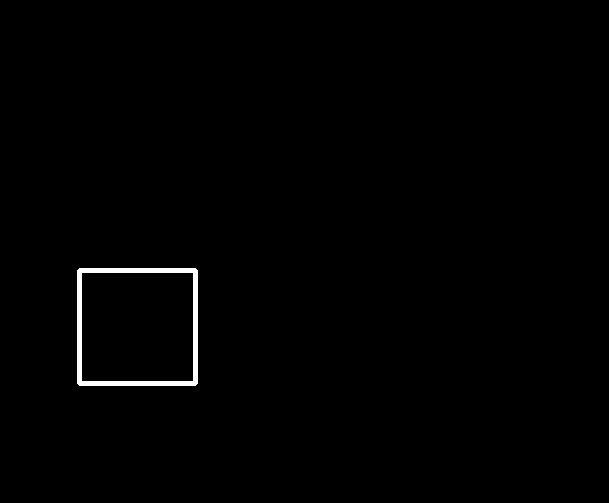

contours[1]面積= 19535.0


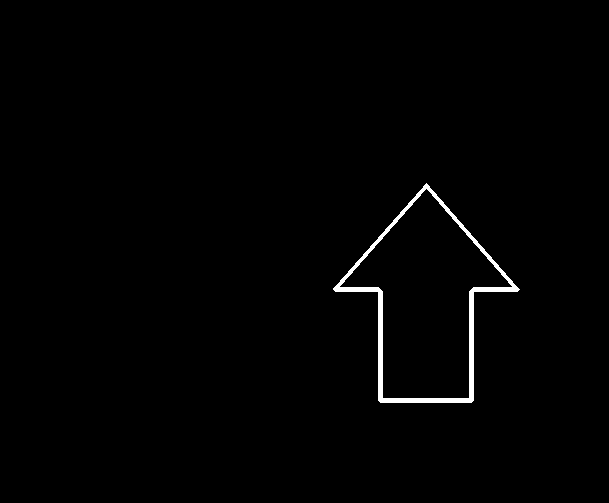

contours[2]面積= 12058.0


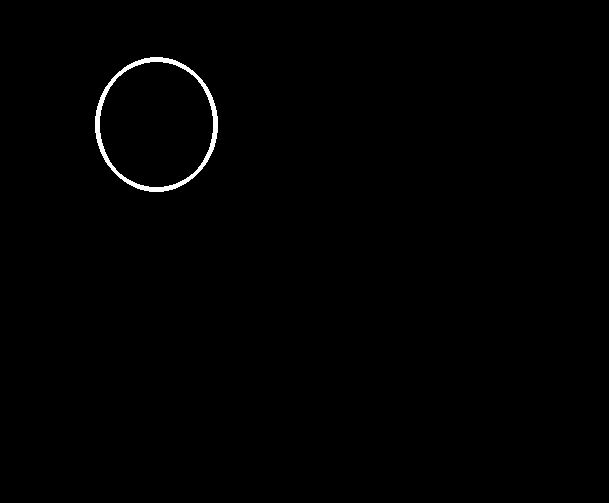

In [7]:
o = cv2.imread('contours.bmp')  
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  
cv2_imshow(o)
n=len(contours)
contoursImg=[]
for i in range(n):
    print("contours["+str(i)+"]面積=",cv2.contourArea(contours[i]))
    temp=np.zeros(o.shape,np.uint8)
    contoursImg.append(temp)
    contoursImg[i]=cv2.drawContours(contoursImg[i],contours,i,(255,255,255),3)
    cv2_imshow(contoursImg[i])

# 計算長度

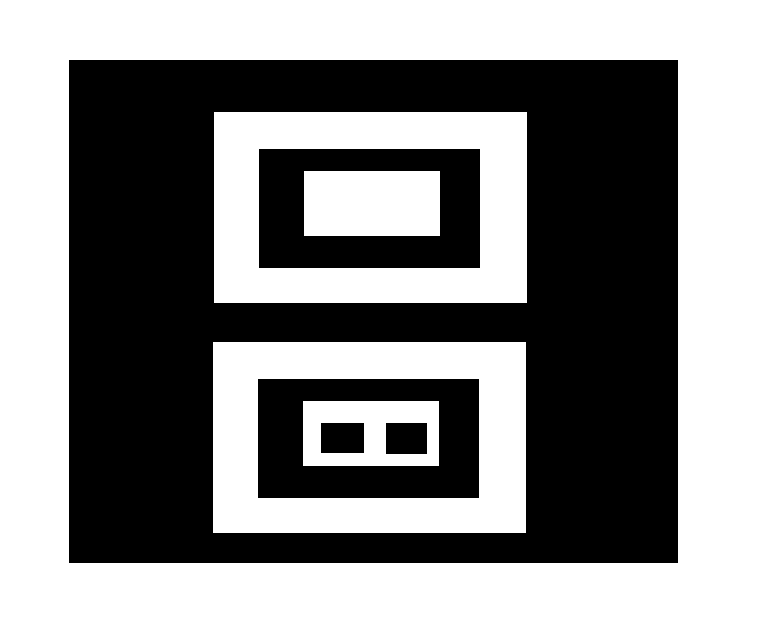

第0個輪廓的長度:145
第1個輪廓的長度:147
第2個輪廓的長度:398
第3個輪廓的長度:681
第4個輪廓的長度:1004
第5個輪廓的長度:398
第6個輪廓的長度:681
第7個輪廓的長度:1004
第8個輪廓的長度:2225
第9個輪廓的長度:2794
輪廓的總長度為：9480
輪廓的平均長度為：948


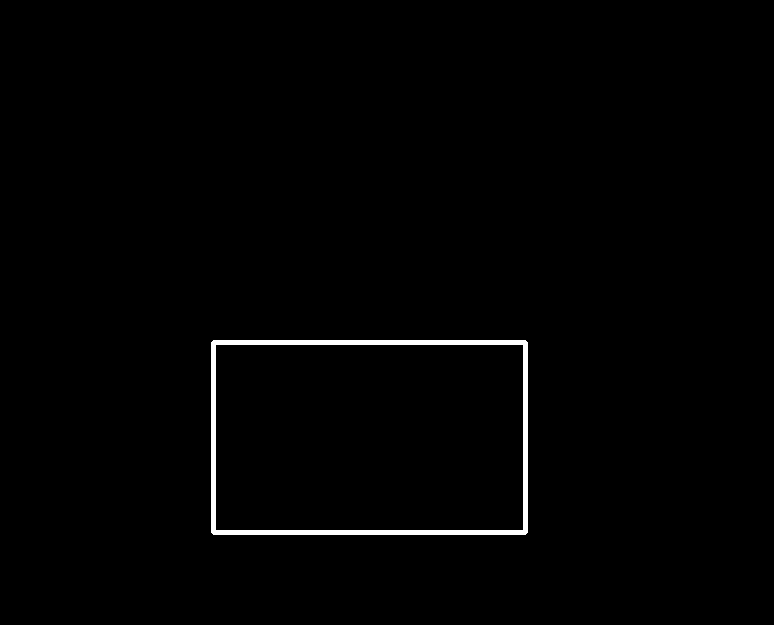

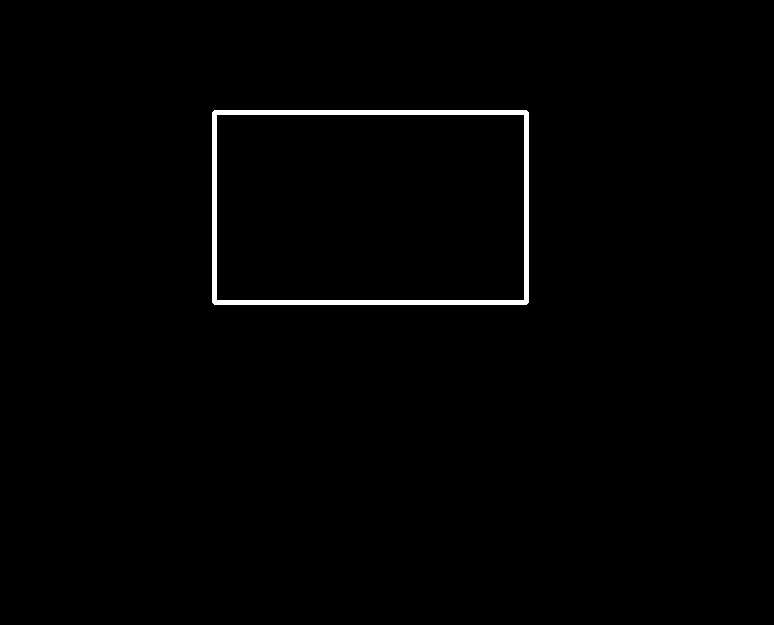

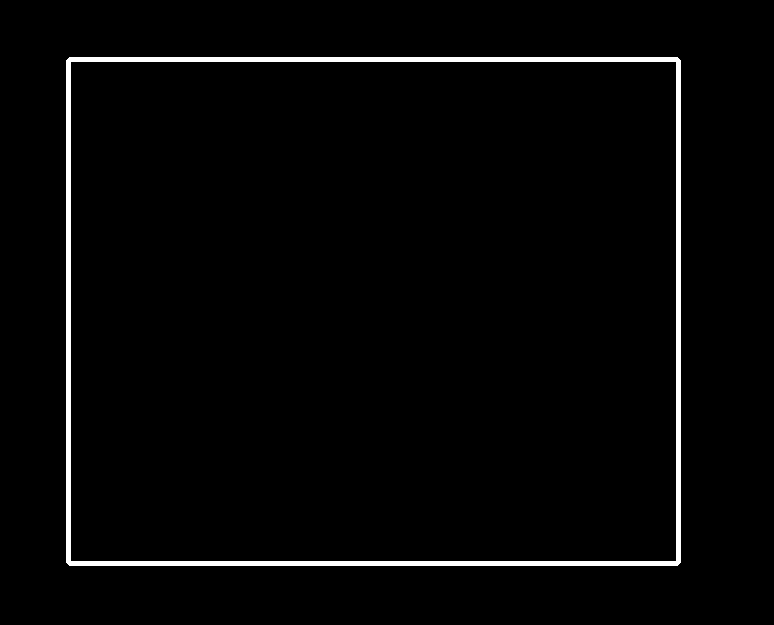

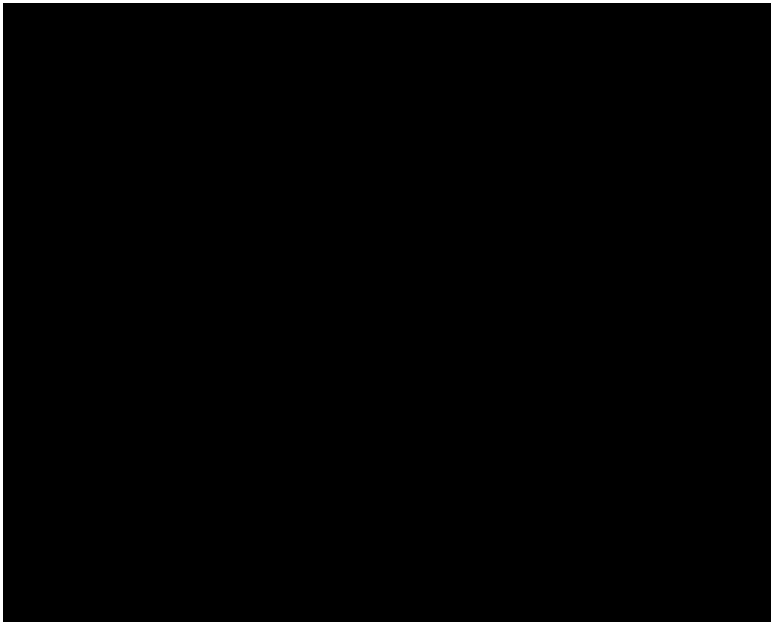

In [8]:
o = cv2.imread('contours0.bmp')  
cv2_imshow(o)
#--------------取得輪廓--------------------
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  
#--------------計算各輪廓的長度之和、平均長度--------------------
n=len(contours)   # 取得輪廓的個數
cntLen=[]          # 儲存各輪廓的長度
for i in range(n):
    cntLen.append(cv2.arcLength(contours[i],True))
    print("第"+str(i)+"個輪廓的長度:%d"%cntLen[i])
cntLenSum=np.sum(cntLen)  # 各輪廓的長度之和
cntLenAvr=cntLenSum/n      # 輪廓長度的平均值
print("輪廓的總長度為：%d"%cntLenSum)
print("輪廓的平均長度為：%d"%cntLenAvr)
#--------------顯示長度超過平均值的輪廓--------------------
contoursImg=[]
for i in range(n):
    temp=np.zeros(o.shape,np.uint8)
    contoursImg.append(temp)
    contoursImg[i]=cv2.drawContours(contoursImg[i],
               contours,i,(255,255,255),3)
    if cv2.arcLength(contours[i],True)>cntLenAvr:
        cv2_imshow(contoursImg[i])

# 影像相似度比對

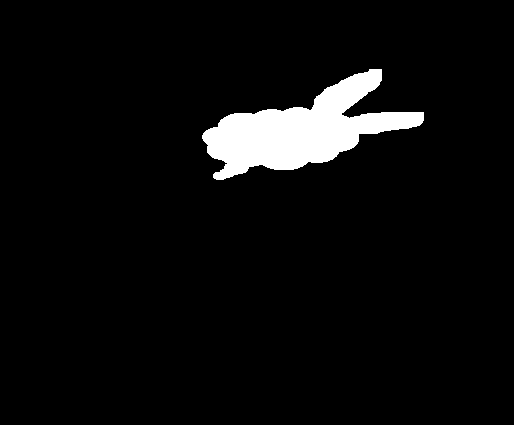

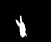

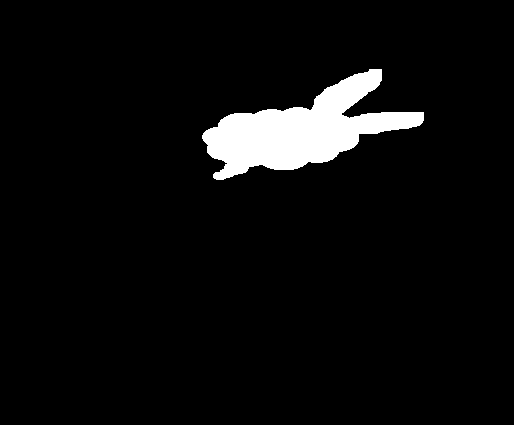

相同影像的matchShape= 0.0
相似影像的matchShape= 0.10720296440067073
不相似影像的matchShape= 0.0


In [9]:
o1 = cv2.imread('cs1.bmp')
o2 = cv2.imread('cs2.bmp')
o3 = cv2.imread('cs.bmp')  
cv2_imshow(o1)
cv2_imshow(o2)
cv2_imshow(o3)
gray1 = cv2.cvtColor(o1,cv2.COLOR_BGR2GRAY) 
gray2 = cv2.cvtColor(o2,cv2.COLOR_BGR2GRAY) 
gray3 = cv2.cvtColor(o3,cv2.COLOR_BGR2GRAY) 
ret, binary1 = cv2.threshold(gray1,127,255,cv2.THRESH_BINARY) 
ret, binary2 = cv2.threshold(gray2,127,255,cv2.THRESH_BINARY) 
ret, binary3 = cv2.threshold(gray3,127,255,cv2.THRESH_BINARY) 
contours1, hierarchy = cv2.findContours(binary1,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)  
contours2, hierarchy = cv2.findContours(binary2,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)  
contours3, hierarchy = cv2.findContours(binary3,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)  
cnt1 = contours1[0]
cnt2 = contours2[0]
cnt3 = contours3[0]
ret0 = cv2.matchShapes(cnt1,cnt1,1,0.0)
ret1 = cv2.matchShapes(cnt1,cnt2,1,0.0)
ret2 = cv2.matchShapes(cnt1,cnt3,1,0.0)
print("相同影像的matchShape=",ret0)
print("相似影像的matchShape=",ret1)
print("不相似影像的matchShape=",ret2)


# 矩形包圍框

In [10]:
#---------------讀取並顯示原始影像------------------ 
o = cv2.imread('cs.bmp')  
#---------------分析影像輪廓------------------ 
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE) 
#---------------傳回頂點及邊長------------------ 
x,y,w,h = cv2.boundingRect(contours[0])
print("頂點及長寬的點形式:")
print("x=",x)
print("y=",y)
print("w=",w)
print("h=",h)
#---------------僅有一個傳回值的情況------------------
rect = cv2.boundingRect(contours[0])
print("\n頂點及長寬的元組（tuple）形式：")
print("rect=",rect)


頂點及長寬的點形式:
x= 202
y= 69
w= 222
h= 111

頂點及長寬的元組（tuple）形式：
rect= (202, 69, 222, 111)


# 畫出矩形包圍框

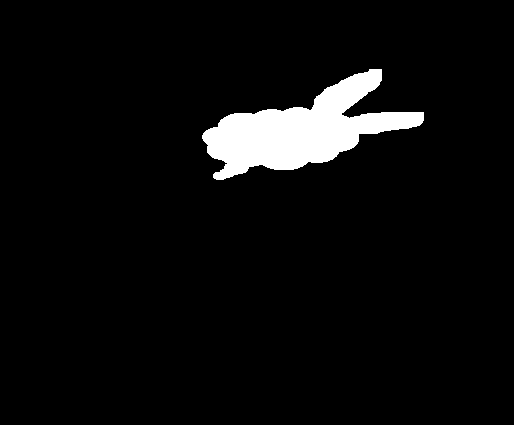

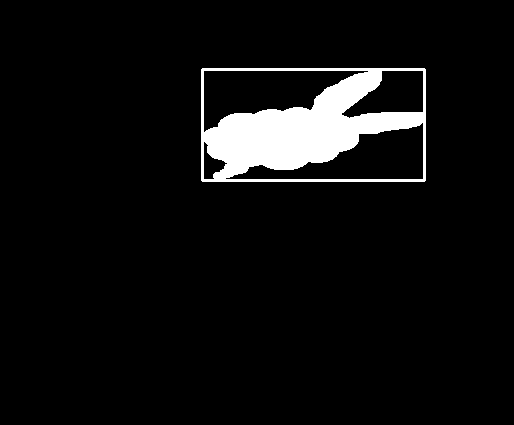

In [11]:
o = cv2.imread('cs.bmp')  
cv2_imshow(o)
#---------------分析影像輪廓------------------ 
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE) 
#---------------建置矩形邊界------------------ 
x,y,w,h = cv2.boundingRect(contours[0])
brcnt = np.array([[[x, y]], [[x+w, y]], [[x+w, y+h]], [[x, y+h]]])
cv2.drawContours(o, [brcnt], -1, (255, 255,255), 2)
#---------------顯示矩形邊界------------------
cv2_imshow(o)


# 最小包圍矩形框

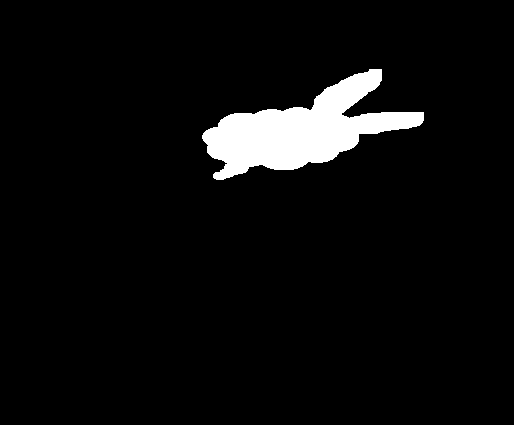

傳回值rect:
 ((312.20166015625, 126.58940124511719), (74.59136199951172, 219.81109619140625), 72.06110382080078)

轉換後的points：
 [[196.15193  124.95801 ]
 [405.27707   57.255642]
 [428.2514   128.2208  ]
 [219.12625  195.92316 ]]


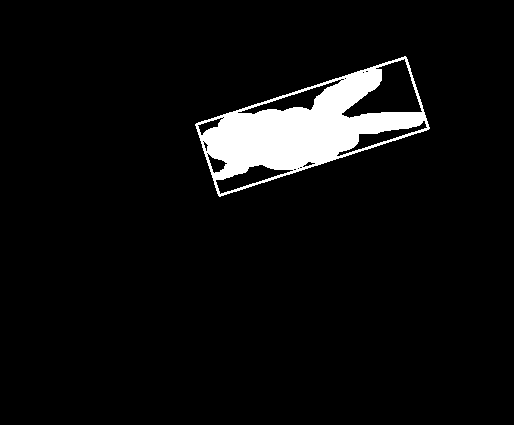

In [12]:
o = cv2.imread('cs.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
rect = cv2.minAreaRect(contours[0])
print("傳回值rect:\n",rect)
points = cv2.boxPoints(rect)
print("\n轉換後的points：\n",points)
points = np.int0(points)  #取整數
image=cv2.drawContours(o,[points],0,(255,255,255),2)
cv2_imshow(o)


# 最小包圍圓形

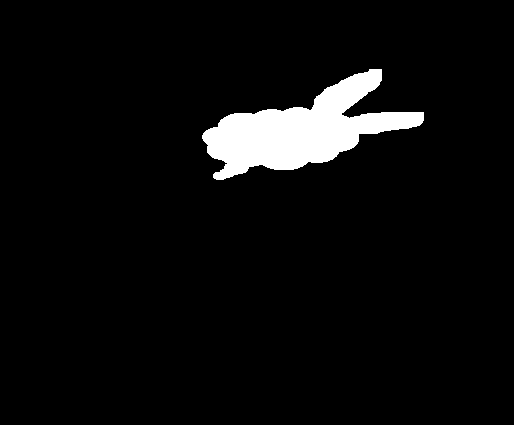

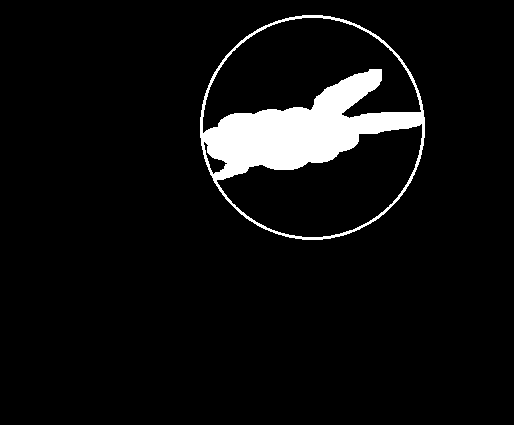

In [13]:
o = cv2.imread('cs.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
(x,y),radius = cv2.minEnclosingCircle(contours[0])
center = (int(x),int(y))
radius = int(radius)
cv2.circle(o,center,radius,(255,255,255),2)
cv2_imshow(o)


# 最佳擬合橢圓

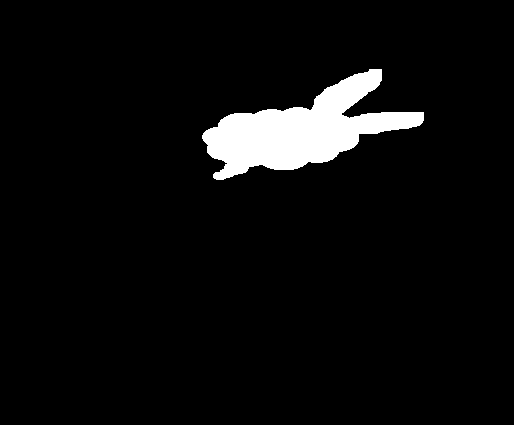

ellipse= ((302.85076904296875, 128.69973754882812), (72.66741180419922, 221.70309448242188), 75.29846954345703)


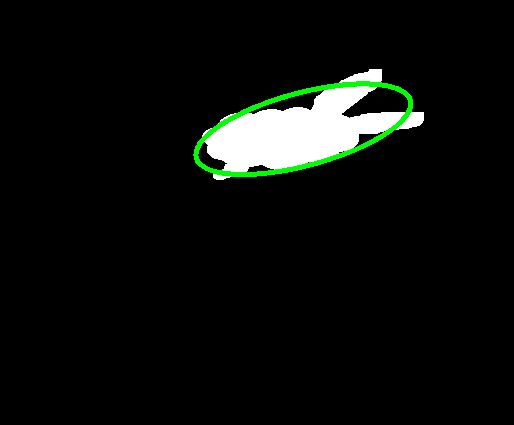

In [14]:
o = cv2.imread('cs.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
cv2_imshow(o)
ellipse = cv2.fitEllipse(contours[0])
print("ellipse=",ellipse)
cv2.ellipse(o,ellipse,(0,255,0),3)
cv2_imshow(o)


# 最佳擬合直線

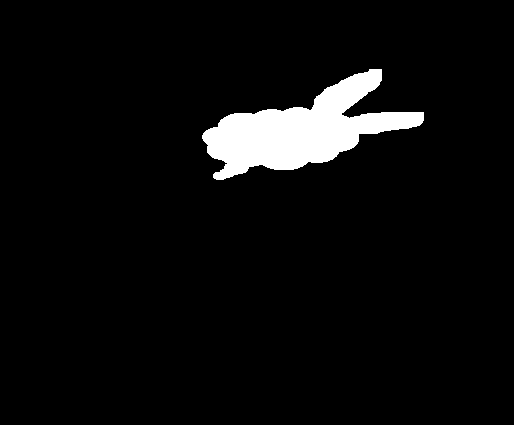

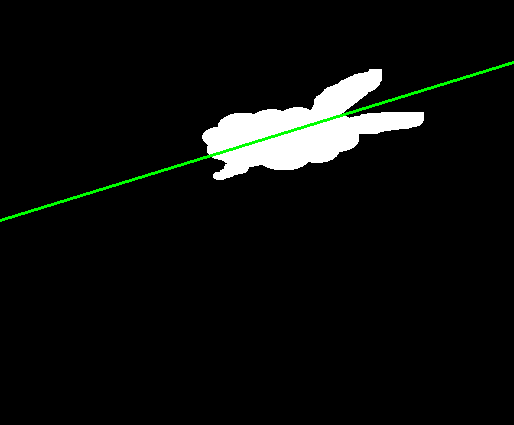

In [15]:
o = cv2.imread('cs.bmp') 
cv2_imshow(o) 
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
rows,cols = image.shape[:2]
[vx,vy,x,y] = cv2.fitLine(contours[0], cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(o,(cols-1,righty),(0,lefty),(0,255,0),2)
cv2_imshow(o)


# 逼近多邊形

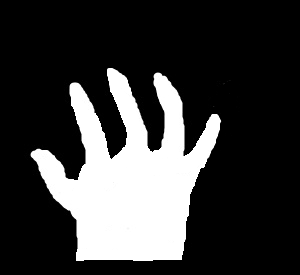

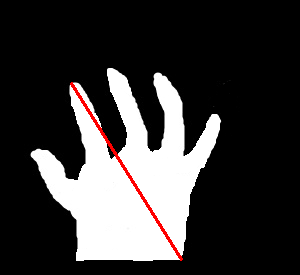

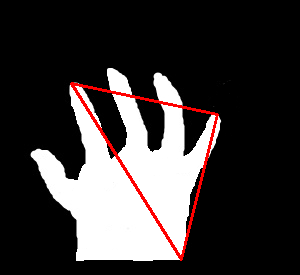

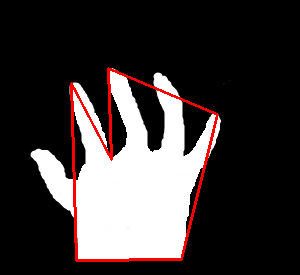

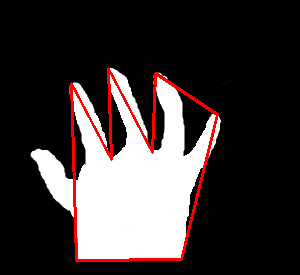

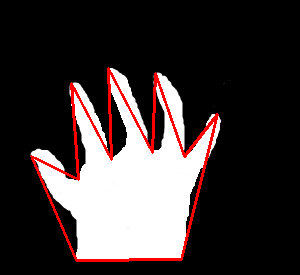

In [16]:
#----------------讀取並顯示原始影像-------------------------------
o = cv2.imread('hand.bmp') 
cv2_imshow(o) 
#----------------取得輪廓-------------------------------
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
#----------------epsilon=0.1*周長-------------------------------
adp = o.copy()
epsilon = 0.1*cv2.arcLength(contours[0],True)
approx = cv2.approxPolyDP(contours[0],epsilon,True)
adp=cv2.drawContours(adp,[approx],0,(0,0,255),2)
cv2_imshow(adp)
#----------------epsilon=0.09*周長-------------------------------
adp = o.copy()
epsilon = 0.09*cv2.arcLength(contours[0],True)
approx = cv2.approxPolyDP(contours[0],epsilon,True)
adp=cv2.drawContours(adp,[approx],0,(0,0,255),2)
cv2_imshow(adp)
#----------------epsilon=0.055*周長-------------------------------
adp = o.copy()
epsilon = 0.055*cv2.arcLength(contours[0],True)
approx = cv2.approxPolyDP(contours[0],epsilon,True)
adp=cv2.drawContours(adp,[approx],0,(0,0,255),2)
cv2_imshow(adp)
#----------------epsilon=0.05*周長-------------------------------
adp = o.copy()
epsilon = 0.05*cv2.arcLength(contours[0],True)
approx = cv2.approxPolyDP(contours[0],epsilon,True)
adp=cv2.drawContours(adp,[approx],0,(0,0,255),2)
cv2_imshow(adp)
#----------------epsilon=0.02*周長-------------------------------
adp = o.copy()
epsilon = 0.02*cv2.arcLength(contours[0],True)
approx = cv2.approxPolyDP(contours[0],epsilon,True)
adp=cv2.drawContours(adp,[approx],0,(0,0,255),2)
cv2_imshow(adp)


# Convex/Hull

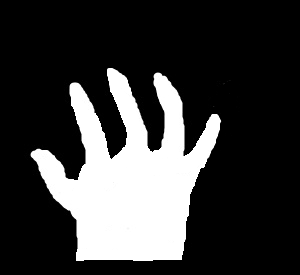

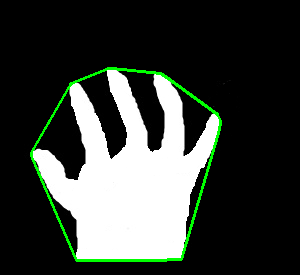

In [17]:
# --------------讀取並繪製原始影像------------------
o = cv2.imread('hand.bmp')  
cv2_imshow(o)
# --------------分析輪廓------------------
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
# --------------尋找Convex|Hull，獲得凸套件的角點------------------
hull = cv2.convexHull(contours[0])
# --------------繪製Convex|Hull------------------
cv2.polylines(o, [hull], True, (0, 255, 0), 2)
# --------------顯示Convex|Hull------------------
cv2_imshow(o)


# 凸缺陷


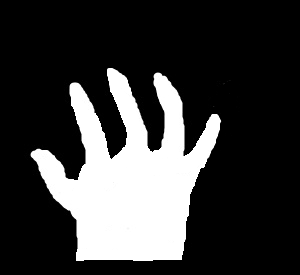

defects=
 [[[    0   102    51 21878]]

 [[  103   184   150 13876]]

 [[  185   233   220  4168]]

 [[  233   238   235   256]]

 [[  238   240   239   247]]

 [[  240   294   255  2715]]

 [[  294   302   295   281]]

 [[  302   304   303   217]]

 [[  305   311   306   114]]

 [[  311   385   342 13666]]

 [[  385   389   386   395]]

 [[  389   489   435 20327]]]


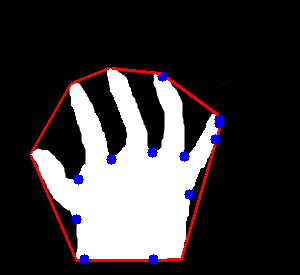

In [18]:
#----------------原圖--------------------------
img = cv2.imread('hand.bmp')
cv2_imshow(img)
#----------------建置輪廓--------------------------
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 127, 255,0)
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_TREE,
                                             cv2.CHAIN_APPROX_SIMPLE)  
#----------------Convex|Hull--------------------------
cnt = contours[0]
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)
print("defects=\n",defects)
#----------------建置凸缺陷--------------------------
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,0,255],2)
    cv2.circle(img,far,5,[255,0,0],-1)
#----------------顯示結果，釋放影像--------------------------
cv2_imshow(img)


# 檢查輪廓是否為凸的

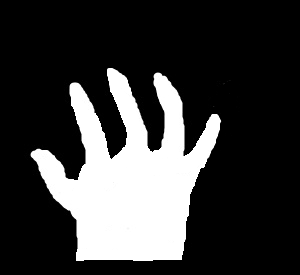

使用函數cv2.convexHull()建置的多邊形是否是凸形的： True


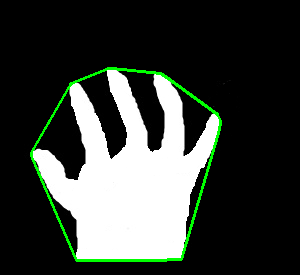

使用函數cv2.approxPolyDP()建置的多邊形是否是凸形的： False


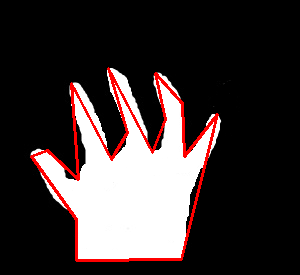

In [19]:
o = cv2.imread('hand.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
#--------------Convex|Hull----------------------
image1=o.copy()
hull = cv2.convexHull(contours[0])
cv2.polylines(image1, [hull], True, (0, 255, 0), 2)
print("使用函數cv2.convexHull()建置的多邊形是否是凸形的：",
      cv2.isContourConvex(hull))
cv2_imshow(image1)
#------------逼近多邊形--------------------
image2=o.copy()
epsilon = 0.01*cv2.arcLength(contours[0],True)
approx = cv2.approxPolyDP(contours[0],epsilon,True)
image2=cv2.drawContours(image2,[approx],0,(0,0,255),2)
print("使用函數cv2.approxPolyDP()建置的多邊形是否是凸形的：",
      cv2.isContourConvex(approx))
cv2_imshow(image2)


# 點到輪廓的距離

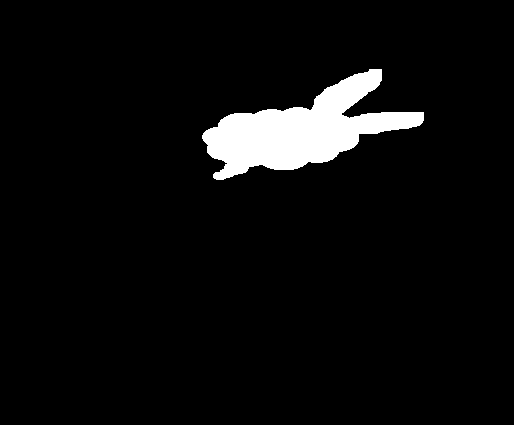

distA= 16.891650862259112
distB= -81.17585848021565
distC= -0.0


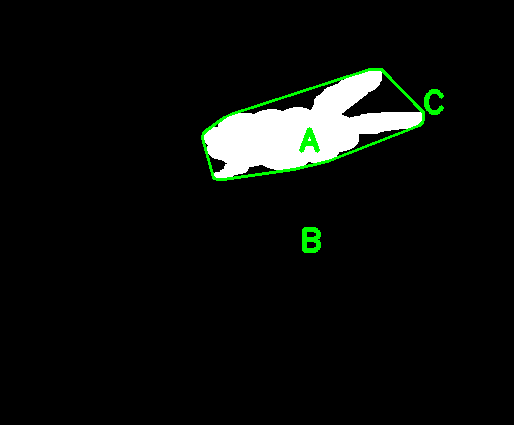

In [20]:
#----------------原始影像-------------------------
o = cv2.imread('cs.bmp')
cv2_imshow(o)
#----------------取得Convex|Hull------------------------  
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
hull = cv2.convexHull(contours[0])
image = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
cv2.polylines(o, [hull], True, (0, 255, 0), 2)
#----------------內部點A到輪廓的距離-------------------------
distA = cv2.pointPolygonTest(hull, (300, 150), True)  
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(o,'A',(300,150), font, 1,(0,255,0),3)
print("distA=",distA) 
#----------------外部點B到輪廓的距離-------------------------
distB = cv2.pointPolygonTest(hull, (300, 250), True)  
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(o,'B',(300,250), font, 1,(0,255,0),3)
print("distB=",distB) 
#------------正好處於輪廓上的點C到輪廓的距離-----------------
distC = cv2.pointPolygonTest(hull, (423, 112), True)  
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(o,'C',(423,112), font, 1,(0,255,0),3)
print("distC=",distC) 
#print(hull)   #測試邊緣到底在哪裡，然後再使用確定位置的點繪製文字
#----------------顯示-------------------------
cv2_imshow(o)


# 點與輪廓的關係(在內部，在上面，在外面)

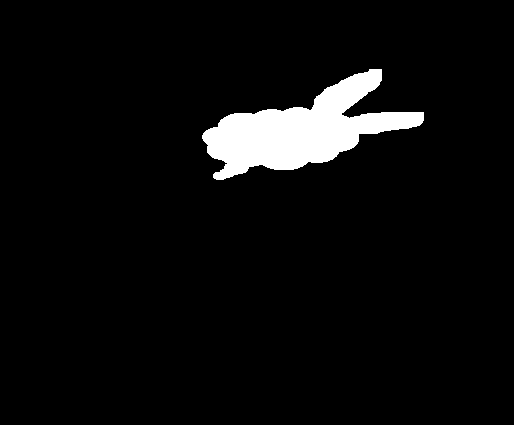

distA= 1.0
distB= -1.0
distC= 0.0


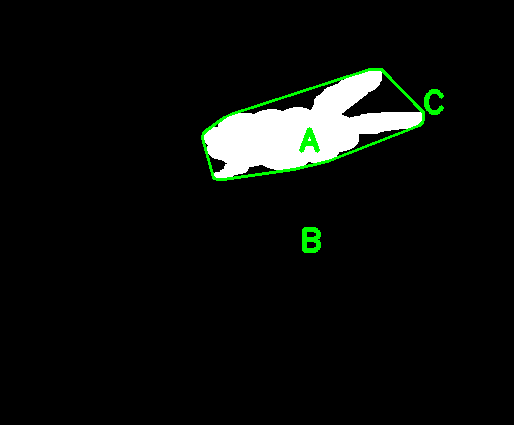

In [21]:
o = cv2.imread('cs.bmp')
cv2_imshow(o)
#----------------取得Convex|Hull------------------------ 
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
hull = cv2.convexHull(contours[0])
image = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
cv2.polylines(image, [hull], True, (0, 255, 0), 2)
#----------------內部點A與輪廓的關係-------------------------
distA = cv2.pointPolygonTest(hull, (300, 150),False)  
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image,'A',(300,150), font, 1,(0,255,0),3)
print("distA=",distA) 
#----------------外部點B與輪廓的關係-------------------------
distB = cv2.pointPolygonTest(hull, (300, 250), False)  
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image,'B',(300,250), font, 1,(0,255,0),3)
print("distB=",distB) 
#----------------邊緣線上的點C與輪廓的關係----------------------
distC = cv2.pointPolygonTest(hull, (423, 112),False)  
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image,'C',(423,112), font, 1,(0,255,0),3)
print("distC=",distC) 
#print(hull)   #測試邊緣到底在哪裡，然後再使用確定位置的點繪製文字
#----------------顯示-------------------------
cv2_imshow(image)


# 利用shape來比較輪廓

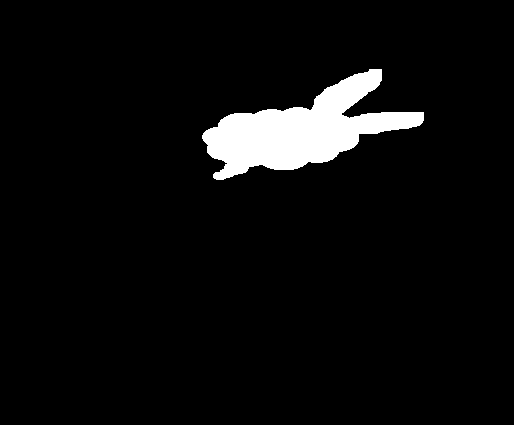

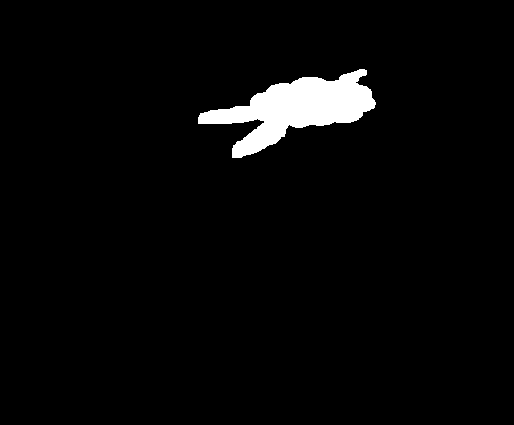

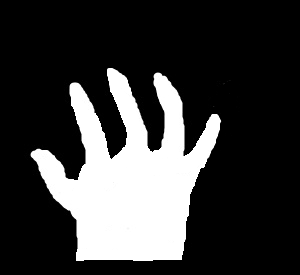

與本身的距離d1= 0.0
與旋轉縮放後的本身影像的距離d2= 0.7913315892219543
與不相似物件的距離d3= 2.751974105834961


In [23]:
o1 = cv2.imread('cs.bmp')
cv2_imshow(o1)
gray1 = cv2.cvtColor(o1,cv2.COLOR_BGR2GRAY) 
ret, binary1 = cv2.threshold(gray1,127,255,cv2.THRESH_BINARY) 
contours1, hierarchy = cv2.findContours(binary1,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE) 
cnt1 = contours1[0]
#-----------原始影像o2的邊緣--------------------
o2 = cv2.imread('cs3.bmp') 
cv2_imshow(o2) 
gray2 = cv2.cvtColor(o2,cv2.COLOR_BGR2GRAY) 
ret, binary2 = cv2.threshold(gray2,127,255,cv2.THRESH_BINARY) 
contours2, hierarchy = cv2.findContours(binary2,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)  
cnt2 = contours2[0]
#-----------原始影像o3的邊緣--------------------
o3 = cv2.imread('hand.bmp') 
cv2_imshow(o3) 
gray3 = cv2.cvtColor(o3,cv2.COLOR_BGR2GRAY) 
ret, binary3 = cv2.threshold(gray3,127,255,cv2.THRESH_BINARY) 
contours3, hierarchy = cv2.findContours(binary3,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)  
cnt3 = contours3[0]
#-----------建置距離分析運算元--------------------
sd = cv2.createShapeContextDistanceExtractor()
#-----------計算距離--------------------
d1 = sd.computeDistance(cnt1,cnt1)
print("與本身的距離d1=", d1)
d2 = sd.computeDistance(cnt1,cnt2)
print("與旋轉縮放後的本身影像的距離d2=", d2)
d3 = sd.computeDistance(cnt1,cnt3)
print("與不相似物件的距離d3=", d3)
#-----------顯示距離--------------------


# Hausdorff距離比較輪廓

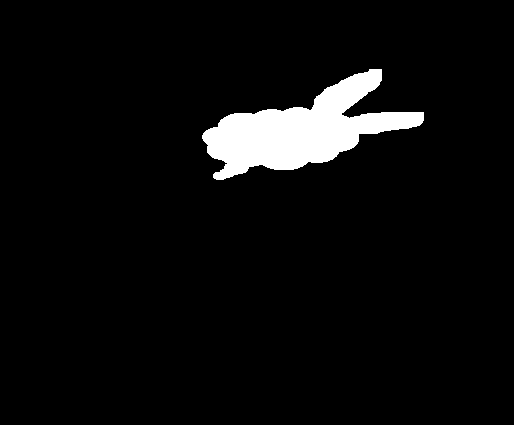

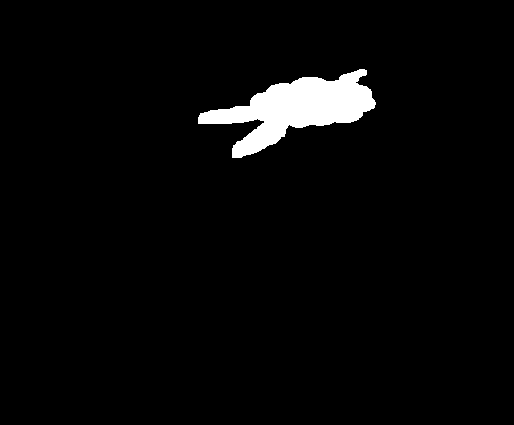

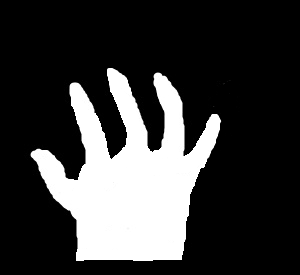

與本身影像的Hausdorff距離d1= 0.0
與旋轉縮放後的本身影像的Hausdorff距離d2= 18.357559204101562
與不相似物件的Hausdorff距離d3= 57.27128601074219


In [24]:
#-----------讀取原始影像--------------------
o1 = cv2.imread('cs.bmp')
o2 = cv2.imread('cs3.bmp') 
o3 = cv2.imread('hand.bmp') 
cv2_imshow(o1)
cv2_imshow(o2) 
cv2_imshow(o3) 
#-----------色彩轉換--------------------
gray1 = cv2.cvtColor(o1,cv2.COLOR_BGR2GRAY) 
gray2 = cv2.cvtColor(o2,cv2.COLOR_BGR2GRAY) 
gray3 = cv2.cvtColor(o3,cv2.COLOR_BGR2GRAY) 
#-----------設定值處理--------------------
ret, binary1 = cv2.threshold(gray1,127,255,cv2.THRESH_BINARY) 
ret, binary2 = cv2.threshold(gray2,127,255,cv2.THRESH_BINARY) 
ret, binary3 = cv2.threshold(gray3,127,255,cv2.THRESH_BINARY) 
#-----------分析輪廓--------------------
contours1, hierarchy = cv2.findContours(binary1,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)  
contours2, hierarchy = cv2.findContours(binary2,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)  
contours3, hierarchy = cv2.findContours(binary3,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)  
cnt1 = contours1[0]
cnt2 = contours2[0]
cnt3 = contours3[0]
#-----------建置距離分析運算元--------------------
hd = cv2.createHausdorffDistanceExtractor()
#-----------計算距離--------------------
d1 = hd.computeDistance(cnt1,cnt1)
print("與本身影像的Hausdorff距離d1=", d1)
d2 = hd.computeDistance(cnt1,cnt2)
print("與旋轉縮放後的本身影像的Hausdorff距離d2=", d2)
d3 = hd.computeDistance(cnt1,cnt3)
print("與不相似物件的Hausdorff距離d3=", d3)
#-----------顯示距離--------------------


# 長寬比

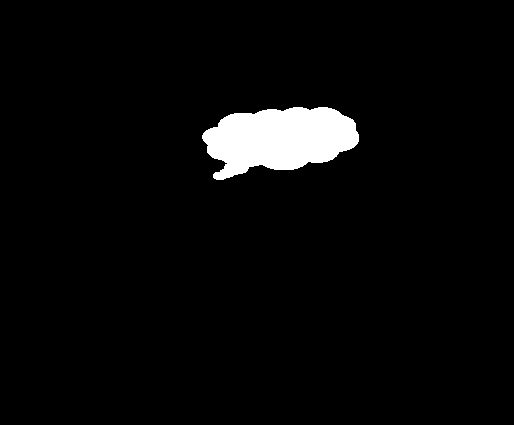

2.1506849315068495


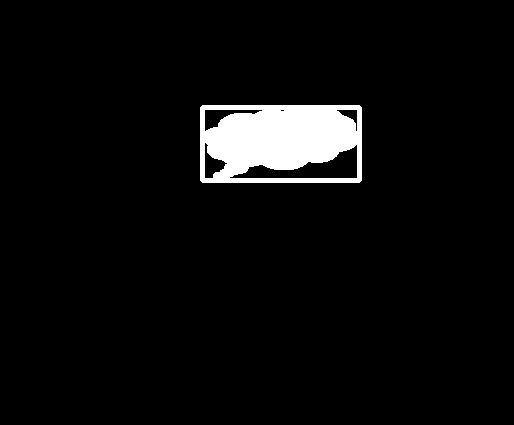

In [26]:
o = cv2.imread('cc.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
x,y,w,h = cv2.boundingRect(contours[0])
cv2.rectangle(o,(x,y),(x+w,y+h),(255,255,255),3)
aspectRatio = float(w)/h
print(aspectRatio)
cv2_imshow(o)


# Extend

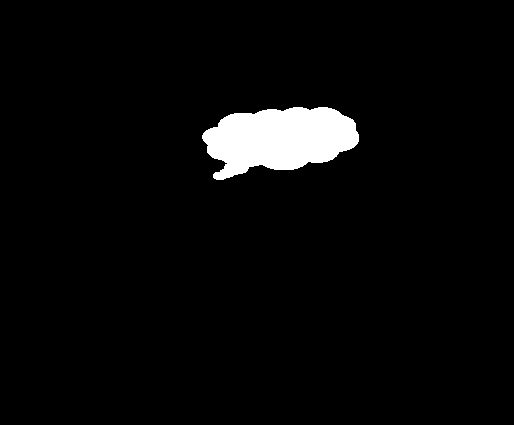

0.6717127650292296


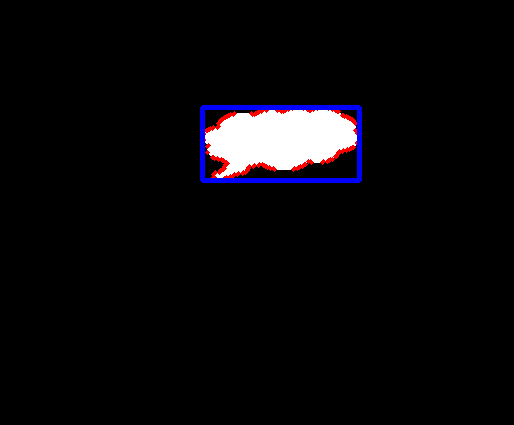

In [27]:
o = cv2.imread('cc.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
x,y,w,h = cv2.boundingRect(contours[0])
cv2.drawContours(o,contours[0],-1,(0,0,255),3) 
cv2.rectangle(o,(x,y),(x+w,y+h),(255,0,0),3)
rectArea=w*h
cntArea=cv2.contourArea(contours[0])
extend=float(cntArea)/rectArea
print(extend)
cv2_imshow(o)


# Solidity

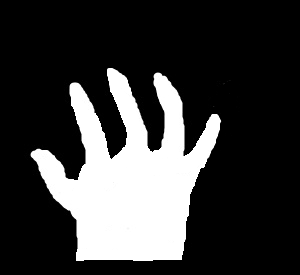

0.6752344564084751


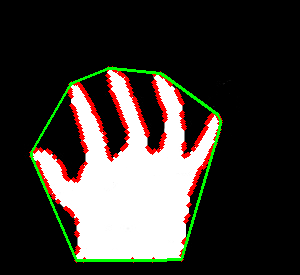

In [28]:
o = cv2.imread('hand.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  
cv2.drawContours(o,contours[0],-1,(0,0,255),3) 
cntArea=cv2.contourArea(contours[0])
hull = cv2.convexHull(contours[0])
hullArea = cv2.contourArea(hull)
cv2.polylines(o, [hull], True, (0, 255, 0), 2)
solidity=float(cntArea)/hullArea
print(solidity)
cv2_imshow(o)


# 等效直徑(等效直徑)

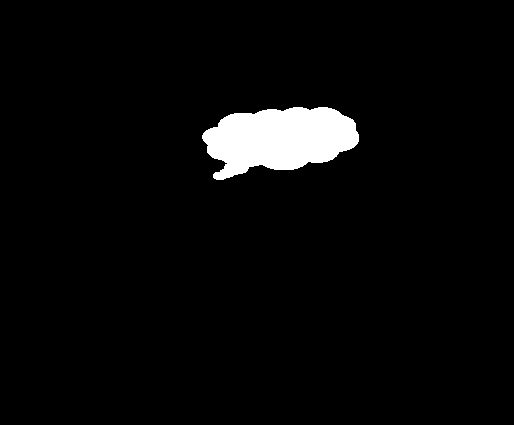

99.00522529212108


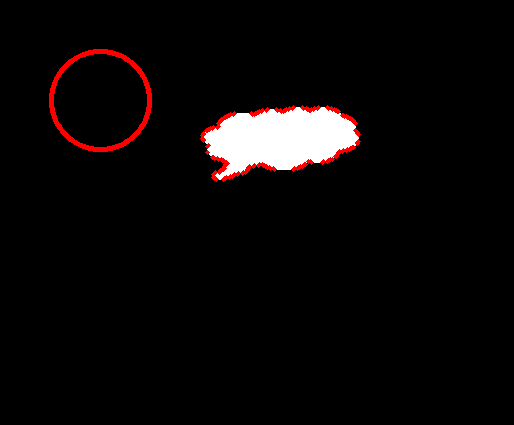

In [29]:
o = cv2.imread('cc.bmp')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
cv2.drawContours(o,contours[0],-1,(0,0,255),3) 
cntArea=cv2.contourArea(contours[0])
equiDiameter = np.sqrt(4*cntArea/np.pi)
print(equiDiameter)
cv2.circle(o,(100,100),int(equiDiameter/2),(0,0,255),3) #展示等直徑大小的圓
cv2_imshow(o)


# 橢圓性質(方向，中心，旋轉角度，水平，垂直軸長等)

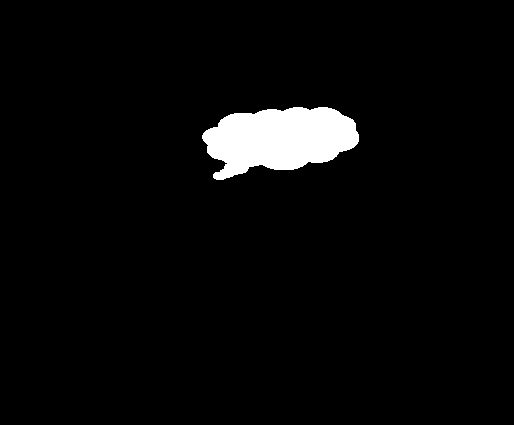

單一傳回值形式：
retval=
 ((276.2112731933594, 139.6067352294922), (63.01350021362305, 166.72308349609375), 82.60102844238281)
三個傳回值形式：
(x,y)=( 276.2112731933594 139.6067352294922 )
(MA,ma)=( 63.01350021362305 166.72308349609375 )
angle= 82.60102844238281


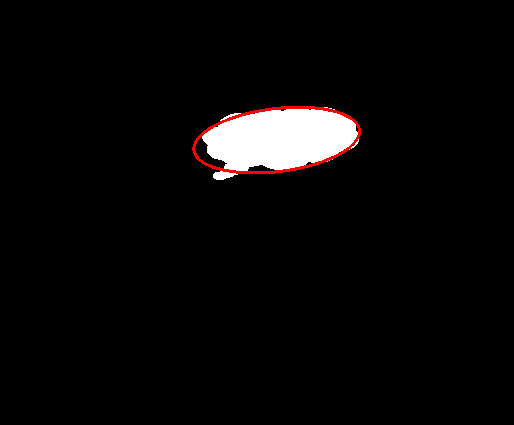

In [30]:
o = cv2.imread('cc.bmp')
cv2_imshow(o)  
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
ellipse = cv2.fitEllipse(contours[0])
retval=cv2.fitEllipse(contours[0])
print("單一傳回值形式：")
print("retval=\n",retval)
(x,y),(MA,ma),angle = cv2.fitEllipse(contours[0])
print("三個傳回值形式：")
print("(x,y)=(",x,y,")")
print("(MA,ma)=(",MA,ma,")")
print("angle=",angle)
cv2.ellipse(o,ellipse,(0,0,255),2)
cv2_imshow(o)


# 使用numpy獲得輪廓的像素點位置

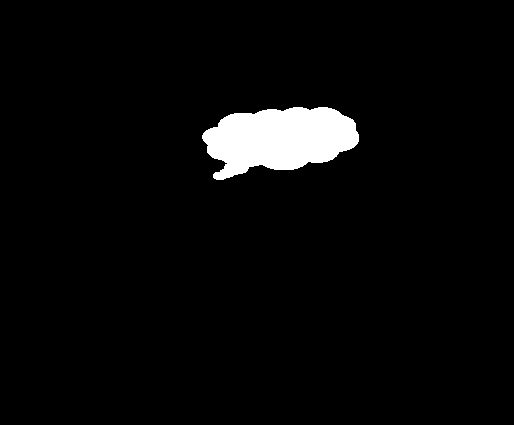

pixelpoints1.shape= (1400, 2)
pixelpoints1=
 [[106 292]
 [106 293]
 [106 294]
 ...
 [180 222]
 [180 223]
 [180 224]]


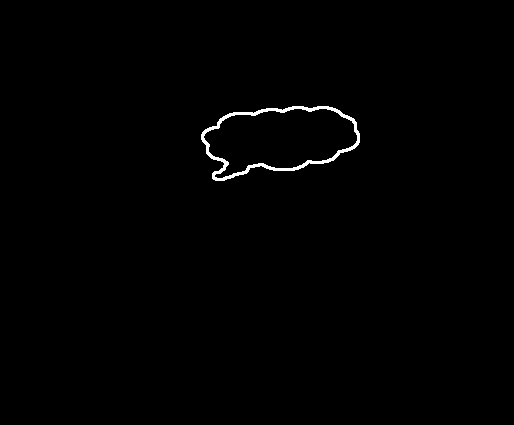

pixelpoints2.shape= (7892, 2)
pixelpoints2=
 [[107 293]
 [107 294]
 [107 295]
 ...
 [179 221]
 [179 222]
 [179 223]]


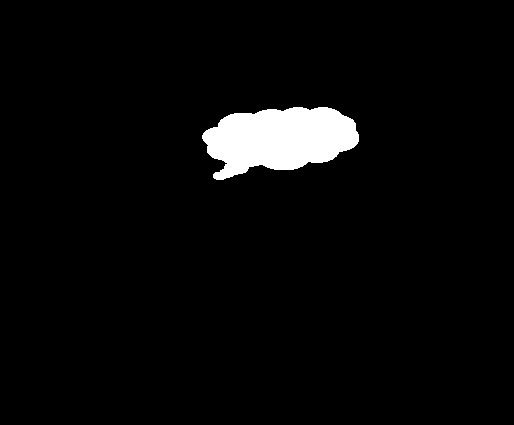

In [31]:
#-----------------讀取原始影像----------------------
o = cv2.imread('cc.bmp')  
cv2_imshow(o)
#-----------------取得輪廓------------------------
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
cnt=contours[0]
#-----------------繪製空心輪廓------------------------
mask1 = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask1,[cnt],0,255,2)
pixelpoints1 = np.transpose(np.nonzero(mask1))
print("pixelpoints1.shape=",pixelpoints1.shape)
print("pixelpoints1=\n",pixelpoints1)
cv2_imshow(mask1)
#-----------------繪製實心輪廓---------------------
mask2 = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask2,[cnt],0,255,-1)
pixelpoints2 = np.transpose(np.nonzero(mask2))
print("pixelpoints2.shape=",pixelpoints2.shape)
print("pixelpoints2=\n",pixelpoints2)
cv2_imshow(mask2)


# 使用`cv2.findNonZero()`取得輪廓點

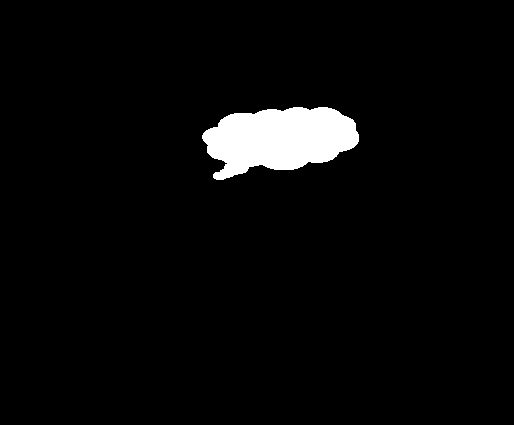

pixelpoints1.shape= (1400, 1, 2)
pixelpoints1=
 [[[292 106]]

 [[293 106]]

 [[294 106]]

 ...

 [[222 180]]

 [[223 180]]

 [[224 180]]]


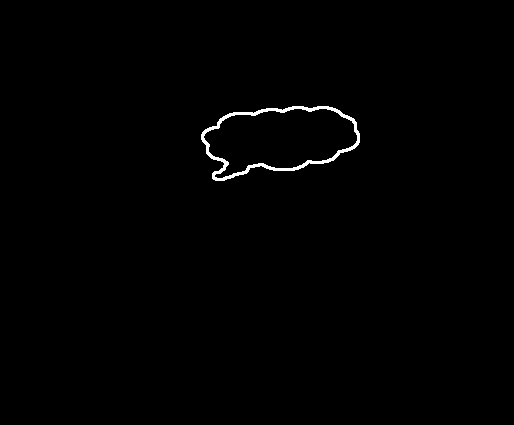

pixelpoints2.shape= (7892, 1, 2)
pixelpoints2=
 [[[293 107]]

 [[294 107]]

 [[295 107]]

 ...

 [[221 179]]

 [[222 179]]

 [[223 179]]]


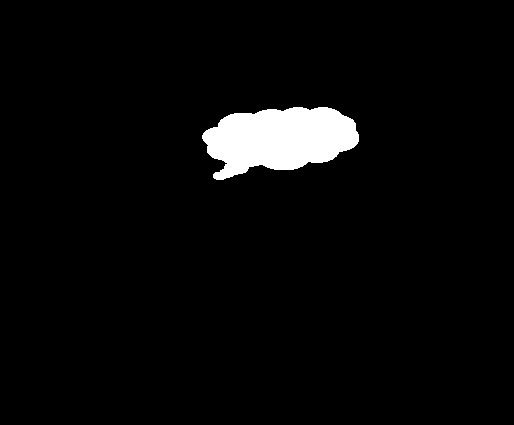

In [32]:
o = cv2.imread('cc.bmp')  
cv2_imshow(o)
#-----------------取得輪廓------------------------
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
cnt=contours[0]
#-----------------繪製空心輪廓------------------------
mask1 = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask1,[cnt],0,255,2)
pixelpoints1 = cv2.findNonZero(mask1)
print("pixelpoints1.shape=",pixelpoints1.shape)
print("pixelpoints1=\n",pixelpoints1)
cv2_imshow(mask1)
#-----------------繪製實心輪廓---------------------
mask2 = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask2,[cnt],0,255,-1)
pixelpoints2 = cv2.findNonZero(mask2)
print("pixelpoints2.shape=",pixelpoints2.shape)
print("pixelpoints2=\n",pixelpoints2)
cv2_imshow(mask2)


# 尋找圖形顏色極大、極小值其位置資訊

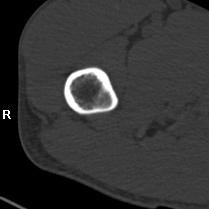

minVal= 42.0
maxVal= 200.0
minLoc= (87, 90)
maxLoc= (90, 110)


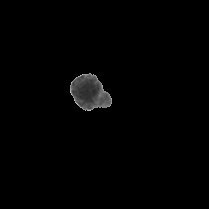

In [33]:
o = cv2.imread('ct.png')  
cv2_imshow(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  
cnt=contours[2]   #coutours[0]、coutours[1]是左側字母R
#--------使用遮罩取得有興趣區域的最值-----------------
#需要注意函數minMaxLoc處理的物件為灰階影像，本例中處理的物件為灰階影像gray
#如果希望取得彩色影像的最值，需要分析各個通道影像，為每個通道獨立計算最值
mask = np.zeros(gray.shape,np.uint8)
mask=cv2.drawContours(mask,[cnt],-1,255,-1)   
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray,mask = mask)
print("minVal=",minVal)
print("maxVal=",maxVal)
print("minLoc=",minLoc)
print("maxLoc=",maxLoc)
#--------使用遮罩取得有興趣區域並顯示-----------------
masko = np.zeros(o.shape,np.uint8)
masko=cv2.drawContours(masko,[cnt],-1,(255,255,255),-1)
loc=cv2.bitwise_and(o,masko) 
cv2_imshow(loc)

# 平均顏色或灰度(灰階)

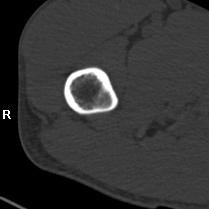

meanVal=
 (85.45594913714804, 85.45594913714804, 85.45594913714804, 0.0)


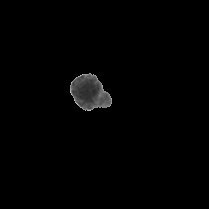

In [34]:
#--------讀取並顯示原始影像-----------------
o = cv2.imread('ct.png')  
cv2_imshow(o)
#--------取得輪廓-----------------
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,
                                             cv2.RETR_LIST,
                                             cv2.CHAIN_APPROX_SIMPLE)  
cnt=contours[2] #coutours[0]、coutours[1]是左側字母R
#--------使用遮罩取得有興趣區域的平均值----------------- 
mask = np.zeros(gray.shape,np.uint8) #建置mean所使用的遮罩（必須是單通道的）
cv2.drawContours(mask,[cnt],0,(255,255,255),-1)
meanVal = cv2.mean(o,mask = mask)  # mask是一個區域，所以必須是單通道的
print("meanVal=\n",meanVal)
#--------使用遮罩取得有興趣區域並顯示-----------------
masko = np.zeros(o.shape,np.uint8)
cv2.drawContours(masko,[cnt],-1,(255,255,255),-1)
loc=cv2.bitwise_and(o,masko)
cv2_imshow(loc)


# 輪廓的端點

leftmost= (202, 135)
rightmost= (423, 120)
topmost= (369, 69)
bottommost= (216, 179)


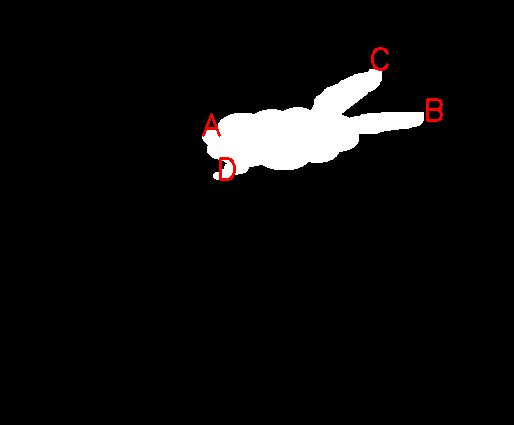

In [35]:
o = cv2.imread('cs.bmp')  
#--------取得並繪製輪廓-----------------
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  
mask = np.zeros(gray.shape,np.uint8)
cnt=contours[0] 
cv2.drawContours(mask,[cnt],0,255,-1)
#--------計算極值----------------- 
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
#--------列印極值----------------- 
print("leftmost=",leftmost)
print("rightmost=",rightmost)
print("topmost=",topmost)
print("bottommost=",bottommost)
#--------繪製說明文字----------------- 
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(o,'A',leftmost, font, 1,(0,0,255),2)
cv2.putText(o,'B',rightmost, font, 1,(0,0,255),2)
cv2.putText(o,'C',topmost, font, 1,(0,0,255),2)
cv2.putText(o,'D',bottommost, font, 1,(0,0,255),2)
#--------繪製影像----------------- 
cv2_imshow(o)
